In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# load the dataset
data = pd.read_csv('Clean_Dataset.csv')
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
# delete unnecessary columns
data.drop(columns=['Unnamed: 0', 'flight'], inplace=True)

In [5]:
# view the data shape and info
print('資料筆數:', data.shape[0])
print('資料欄位:', data.shape[1])
data.info()

資料筆數: 300153
資料欄位: 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [6]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


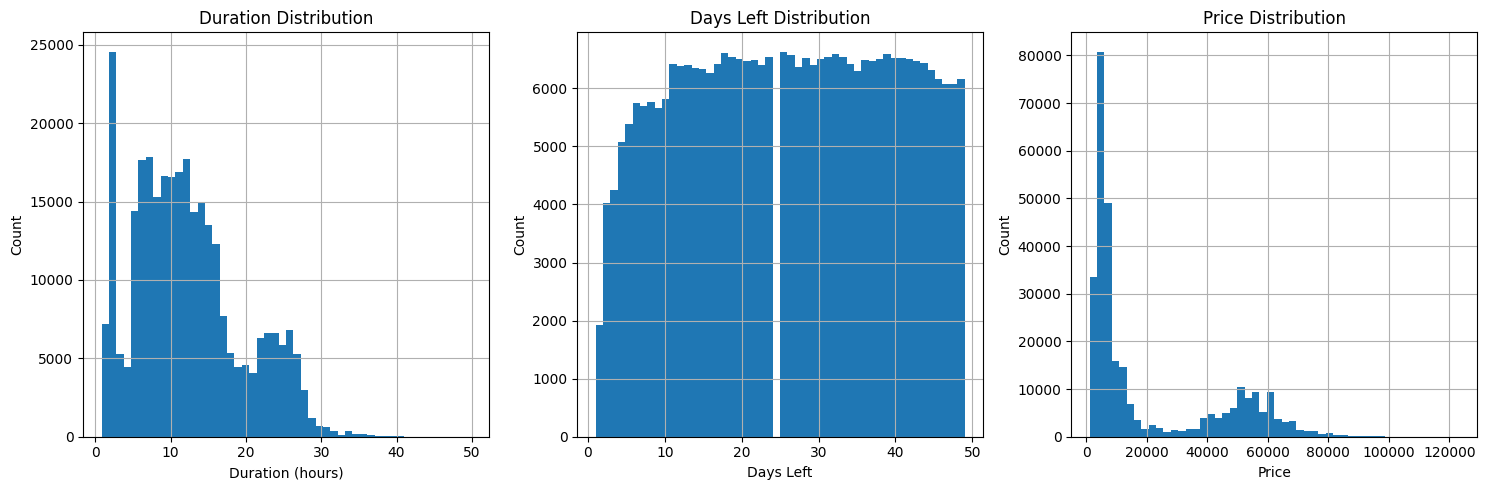

In [8]:
# 觀察數值型欄位的資料分布
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

data['duration'].hist(ax=axes[0], bins=50)
axes[0].set_title('Duration Distribution')
axes[0].set_xlabel('Duration (hours)')
axes[0].set_ylabel('Count')

data['days_left'].hist(ax=axes[1], bins=50)
axes[1].set_title('Days Left Distribution')
axes[1].set_xlabel('Days Left')
axes[1].set_ylabel('Count')

data['price'].hist(ax=axes[2], bins=50)
axes[2].set_title('Price Distribution')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Count')

plt.tight_layout()

In [9]:
# 偏態轉換

data['price'] = np.log1p(data['price'])
data['duration'] = np.log1p(data['duration'])

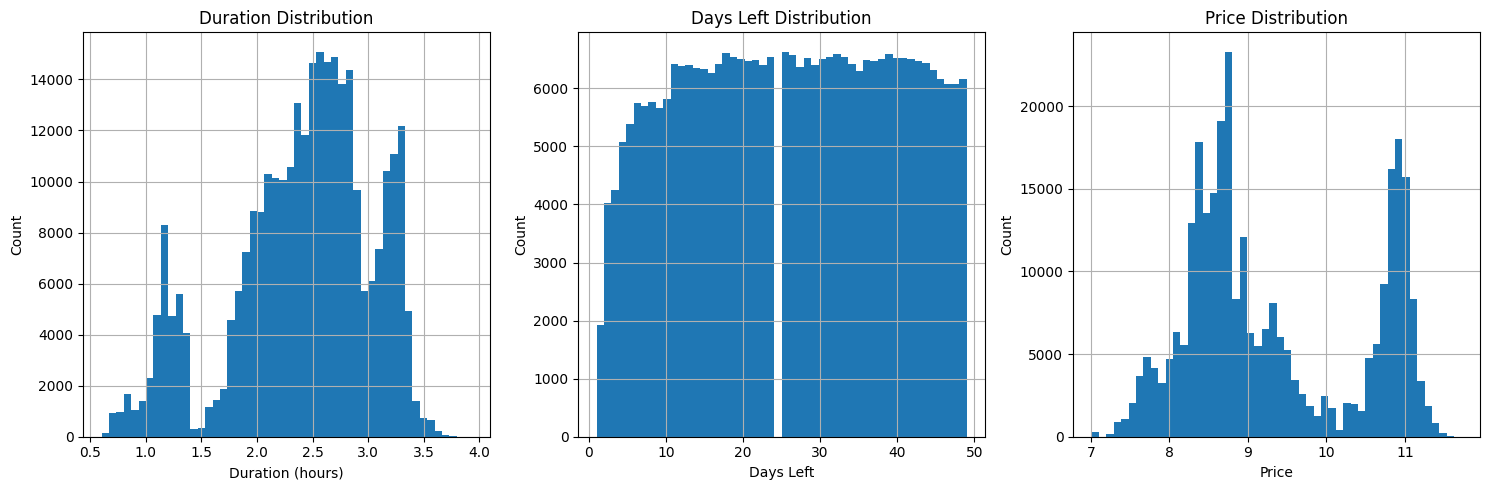

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

data['duration'].hist(ax=axes[0], bins=50)
axes[0].set_title('Duration Distribution')
axes[0].set_xlabel('Duration (hours)')
axes[0].set_ylabel('Count')

data['days_left'].hist(ax=axes[1], bins=50)
axes[1].set_title('Days Left Distribution')
axes[1].set_xlabel('Days Left')
axes[1].set_ylabel('Count')

data['price'].hist(ax=axes[2], bins=50)
axes[2].set_title('Price Distribution')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Count')

plt.tight_layout()

In [ ]:
# encode categorical columns

le = LabelEncoder()
ore = OrdinalEncoder(categories=[['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']])

data['stops'] = data['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2})
data['class'] = data['class'].replace({'Economy': 0, 'Business': 1})

data['airline'] = le.fit_transform(data['airline'])
data['source_city'] = le.fit_transform(data['source_city'])
data['destination_city'] = le.fit_transform(data['destination_city'])
for col in ['departure_time', 'arrival_time']:
    data[col] = data[col].str.title()

data['departure_time'] = ore.fit_transform(data[['departure_time']])
data['arrival_time'] = ore.fit_transform(data[['arrival_time']])

In [12]:
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,3.0,0,4.0,5,0,1.153732,1,8.691819
1,4,2,0.0,0,1.0,5,0,1.202972,1,8.691819
2,0,2,0.0,0,0.0,5,0,1.153732,1,8.692322
3,5,2,1.0,0,2.0,5,0,1.178655,1,8.692154
4,5,2,1.0,0,1.0,5,0,1.202972,1,8.692154
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,1.0,1,3.0,3,1,2.405142,49,11.145709
300149,5,1,2.0,1,4.0,3,1,2.435366,49,11.252936
300150,5,1,0.0,1,4.0,3,1,2.696652,49,11.278468
300151,5,1,0.0,1,3.0,3,1,2.397895,49,11.309413


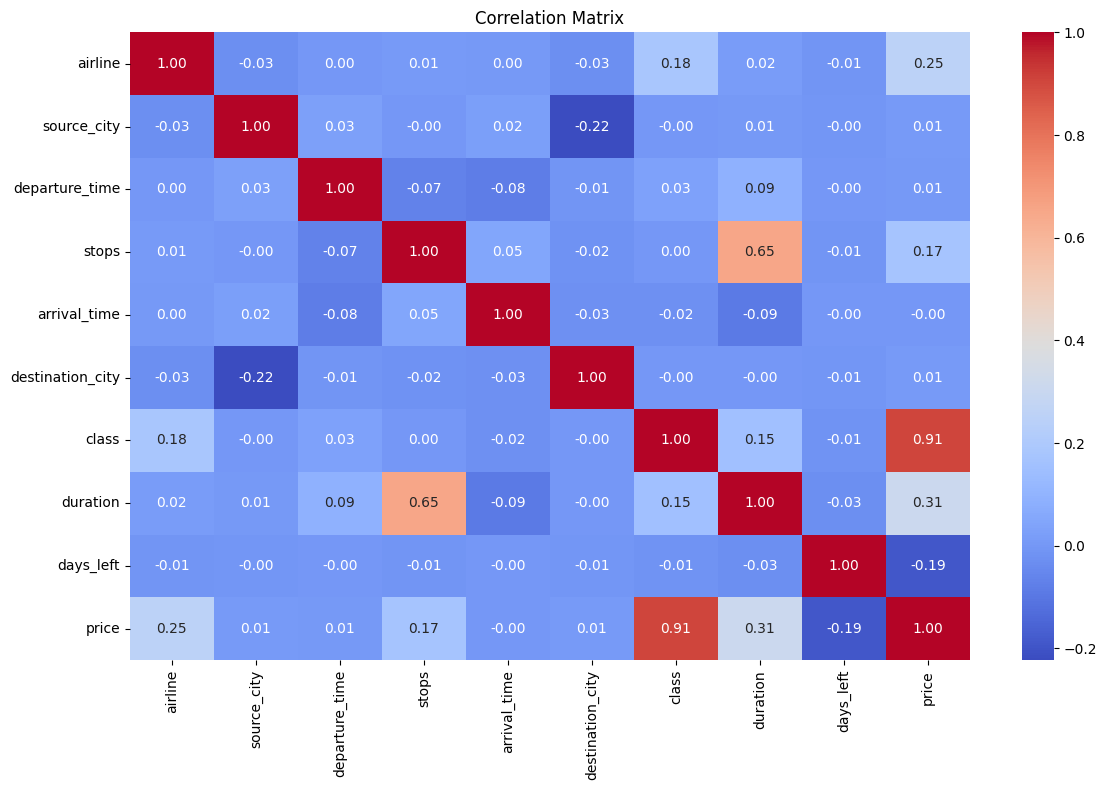

In [13]:
# calculate the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()

# 先加入stops, duration, class三個欄位並利用Random Forest, XGBoost, Catboost三種模型進行機器學習

In [14]:
X = data[['stops', 'duration', 'class']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [15]:
def random_forest_model(x, y):
    rf_model = RandomForestRegressor()
    rf_model.fit(x, y)
    return rf_model

def xgboost_model(x, y):
    xgb_model = XGBRegressor()
    xgb_model.fit(x, y)
    return xgb_model

def catboost_model(x, y):
    cat_model = CatBoostRegressor(silent=True)
    cat_model.fit(x, y)
    return cat_model
    
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print('Score:', round(score, 4)*100, '%')
    print('MAE:', round(mae, 4)*100, '%')
    print('RMSE:', round(rmse, 4)*100, '%')
    print('R2:', round(r2, 4)*100, '%')

In [16]:
model1 = random_forest_model(X_train, y_train)
evaluate_model(model1, X_test, y_test)

Score: 87.37 %
MAE: 28.95 %
RMSE: 39.57 %
R2: 87.37 %


In [17]:
model2 = xgboost_model(X_train, y_train)
evaluate_model(model2, X_test, y_test)

Score: 87.27000000000001 %
MAE: 29.160000000000004 %
RMSE: 39.72 %
R2: 87.27000000000001 %


In [18]:
model3 = catboost_model(X_train, y_train)
evaluate_model(model3, X_test, y_test)

Score: 87.29 %
MAE: 29.12 %
RMSE: 39.69 %
R2: 87.29 %


# 接著將所有data欄位一同丟入三種模型進行訓練

In [19]:
X1 = data[['departure_time', 'arrival_time', 'airline', 'source_city', 'destination_city', 'stops', 'duration', 'class', 'days_left']]
y1 = data['price']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=None)

In [20]:
model4 = random_forest_model(X1_train, y1_train)
evaluate_model(model4, X1_test, y1_test)

Score: 98.6 %
MAE: 6.49 %
RMSE: 13.16 %
R2: 98.6 %


In [21]:
model5 = xgboost_model(X1_train, y1_train)
evaluate_model(model5, X1_test, y1_test)

Score: 97.2 %
MAE: 13.100000000000001 %
RMSE: 18.64 %
R2: 97.2 %


In [22]:
model6 = catboost_model(X1_train, y1_train)
evaluate_model(model6, X1_test, y1_test)

Score: 97.09 %
MAE: 13.43 %
RMSE: 19.0 %
R2: 97.09 %
